In [584]:
#importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [585]:
# load Data
df = pd.read_csv(r"C:\Users\hp\Desktop\1. upgrade\1. STUDY material\4 Machine Learning 1\Assignment\day.csv")

In [586]:
# Reading and Understanding the structure of the data

In [587]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [588]:
df.shape

(730, 16)

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [590]:
df.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [591]:
#lets check n drop duplicate values if presents
df.drop_duplicates(inplace=True)

In [592]:
df.shape
# No duplicate valus present in data as shape is same as previous ( before drop duplicate process)

(730, 16)

In [593]:
#Finding percentage of null or missing values
null_perc = round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc
#  There is no null values.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

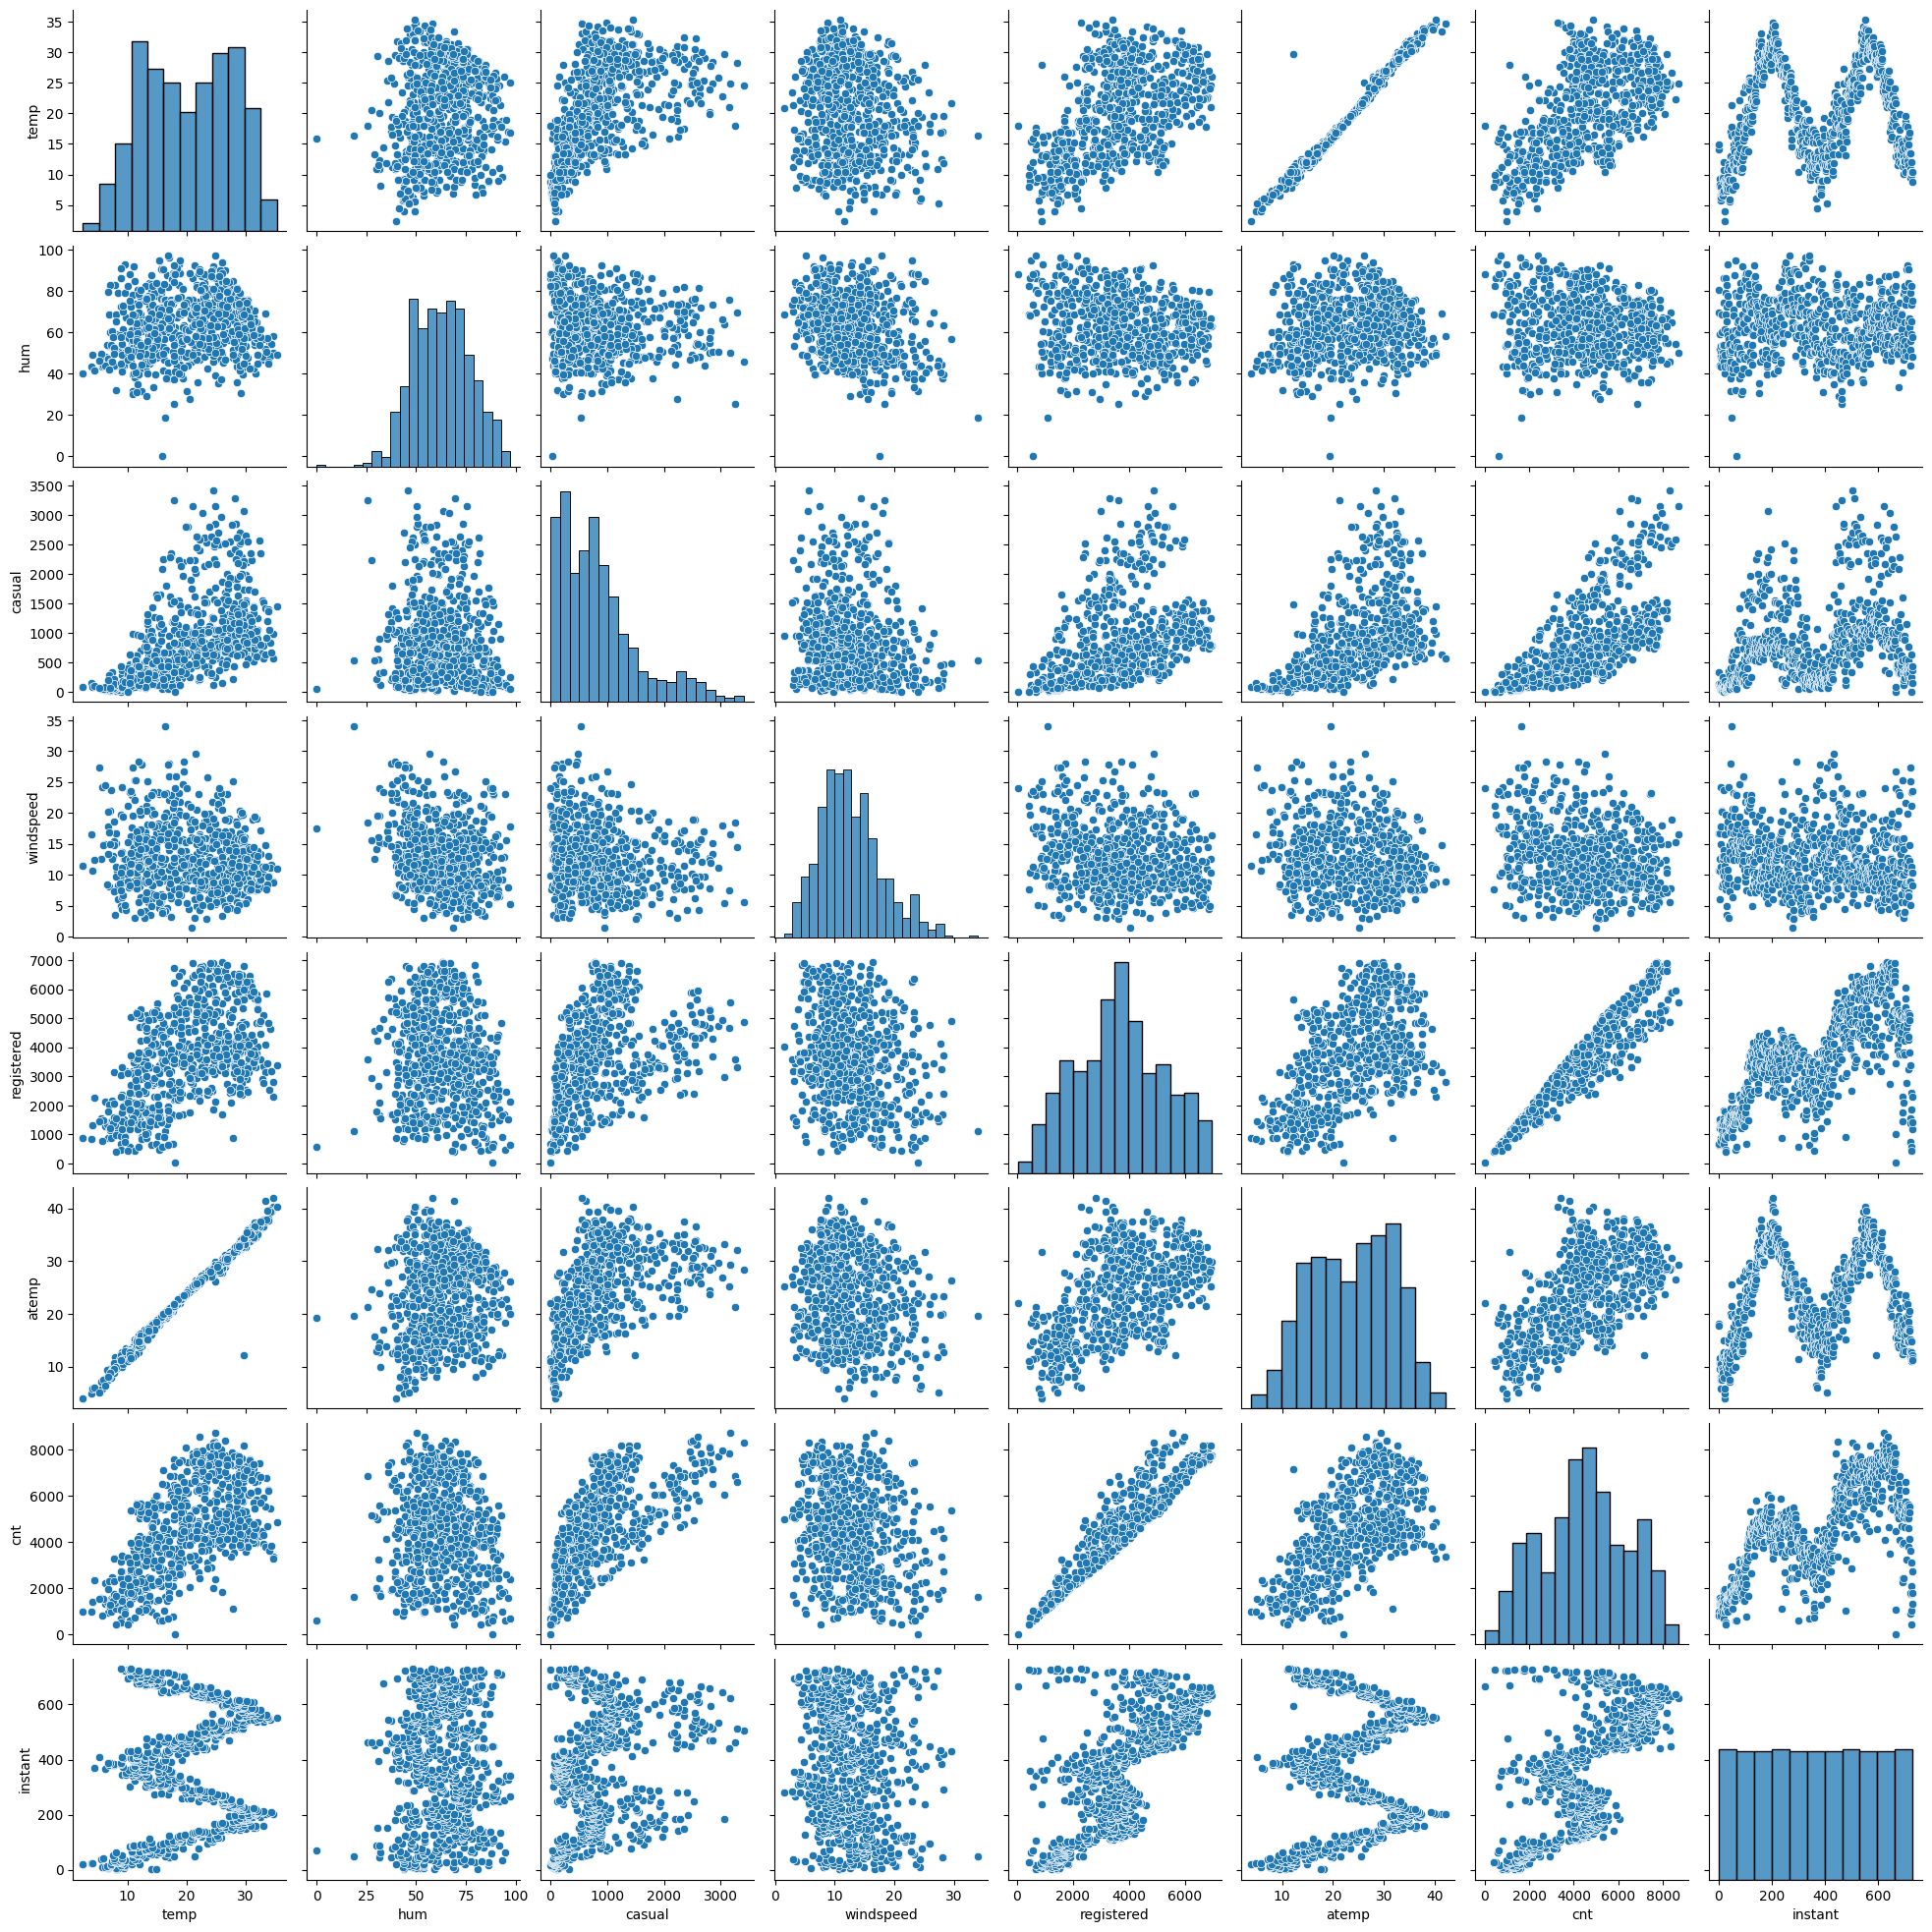

In [594]:
# using pairplot lets visualizing the numeric variables of the dataset
sns.pairplot(df,vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [595]:
#  After analyzed pairplot we can say there is strong connections between count variable and temperature, humidity and windspeed.
# explore these correlation with different variables further.

In [596]:
#lets map categorical variables with their subcategories to help with visualization analysis 

In [597]:
# lets map coloumn season descriptively 
df["season"]=df.season.map({1:"spring", 2: "summer",3:"fall",4:"winter"})

In [598]:
# lets map column mnth descriptively 
df["mnth"]=df.mnth.map({1:"Jan", 2: "Feb", 3:"March", 4:"April", 5:"May", 6:"Jun", 7:"July" , 8:"Aug" , 9:"Sep", 10:"Oct", 11:"Nov" , 12:"Dec"})

In [599]:
# lets map column weathersit descriptively 
df["weathersit"]=df.weathersit.map({1:"Clear", 2:"Mist+Cloudy", 3:"Light Snow", 4:"Snow + Fog"})

In [600]:
# lets map column weekday descriptively 
df["weekday"]=df.weekday.map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

In [601]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


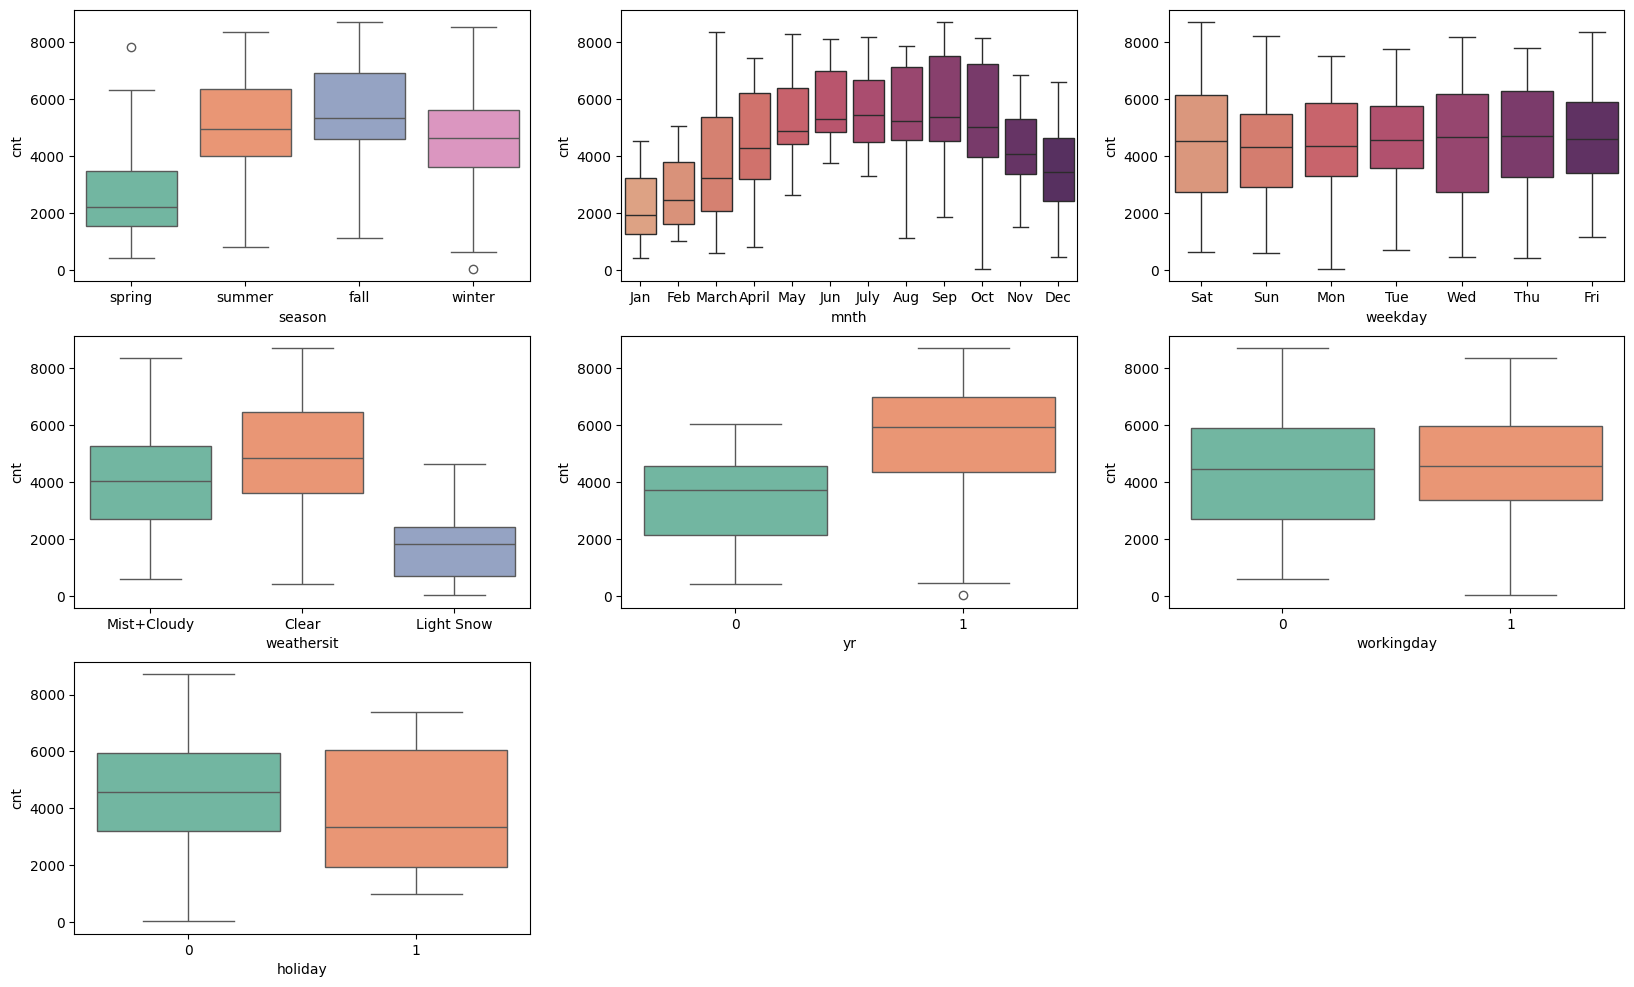

In [602]:
# using boxplot lets visualize data
plt.figure(figsize=(20,12))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df, palette="Set2")
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df,palette="flare")
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=df, palette="flare")
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=df, palette="Set2")
plt.subplot(3, 3, 5)
sns.boxplot(x='yr', y='cnt', data=df, palette="Set2")
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=df, palette="Set2")
plt.subplot(3, 3, 7)
sns.boxplot(x='holiday', y='cnt', data=df, palette="Set2")
plt.show()

In [603]:
# Some of the observations from the plots above are as follows:-

# 1. People are more likely to rent bikes in the fall season and summer 

# 2. Bike rental rates are higher in September and October

# 3. Saturday, Wednesday and Thursday are the days where more bikes are rented

# 4. Most bike rentals take place in the clear weather

# 5. More bikes were rented in 2019

#  6. as we observe , There is no big discernable difference in bike rental rates depending on whether it's a working day or not

# 7. comparing holidays we observe Bike rental rates are higher on holidays

In [604]:
# Lets visualize some more points to analyze details.

<Axes: xlabel='mnth', ylabel='cnt'>

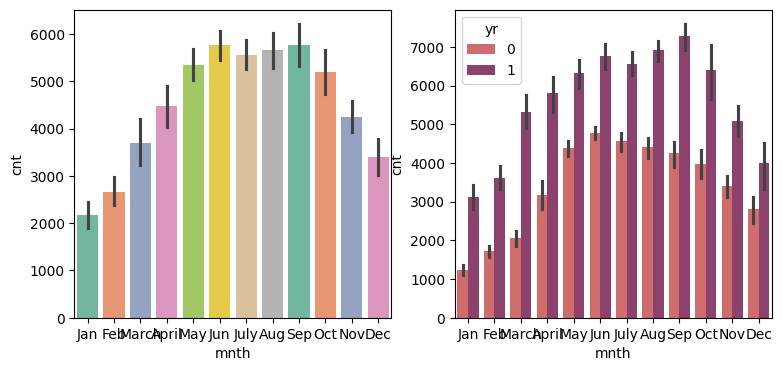

In [605]:
plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
sns.barplot(df, x="mnth", y="cnt", palette="Set2")
plt.subplot(1,2,2)
sns.barplot(df, x="mnth", y="cnt", hue="yr", palette="flare")

In [606]:
# 1. We observe during the first and second quater i.e month of may, june, july, aug, sep and oct.
# 2. we observe bella curve progress of trend i.e increased starting of the year and then it started decreasing.  
# 3. Number of booking for each month seems to have increased from 2018 to 2019 resp.

<Axes: xlabel='weekday', ylabel='cnt'>

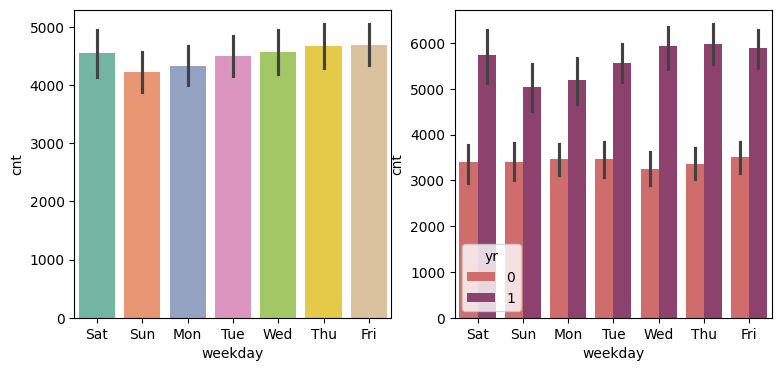

In [607]:
plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
sns.barplot(df, x="weekday", y="cnt", palette="Set2")
plt.subplot(1,2,2)
sns.barplot(df, x="weekday", y="cnt", hue="yr", palette="flare")

In [608]:
# Friday, Saturday and Sunday have more number of bookings as compared to the start of the week.

In [609]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [610]:
corrln = df[["instant", "yr", "holiday","workingday", "temp", "atemp", "hum","windspeed", "casual", "registered", "cnt"]].corr()

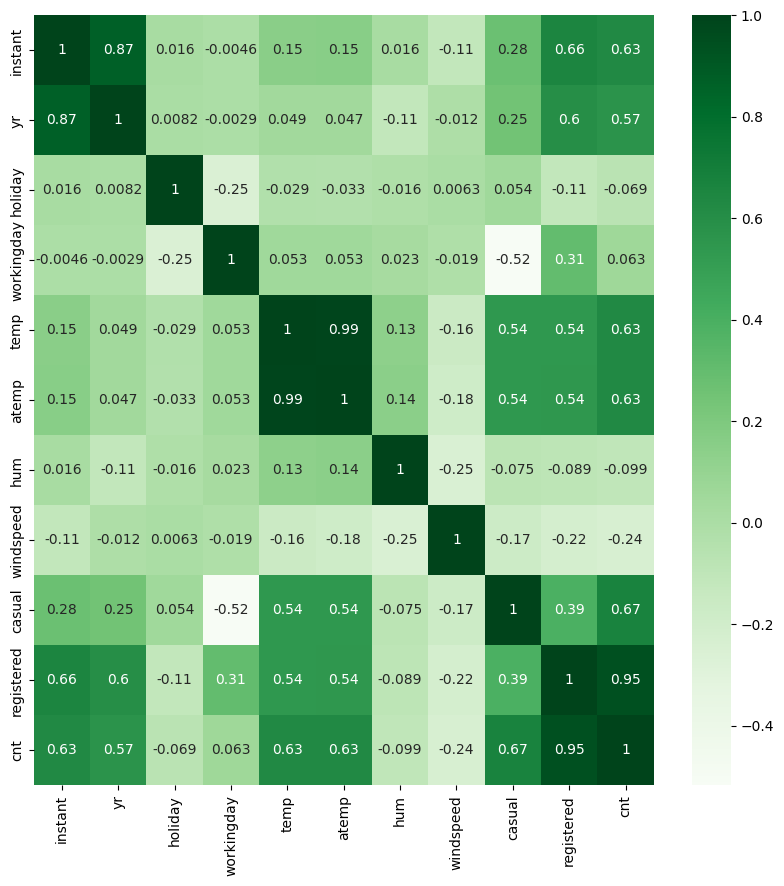

In [611]:
#Lets create correlation between the variables to understand relationships of data
plt.figure(figsize=(10, 10))
sns.heatmap(corrln, cmap="Greens", annot=True)
# plt.title('Correlation between variables in the dataset')
plt.show()

In [612]:
#dropping the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis 
df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [614]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [615]:
# we know that for create model we need categorical values.
# lets convert using dummies.

In [616]:
month = pd.get_dummies(df.mnth, drop_first=True,dtype=float)

In [617]:
weekday = pd.get_dummies(df.weekday, drop_first=True,dtype=float)

In [618]:
weathersit = pd.get_dummies(df.weathersit, drop_first=True,dtype=float)

In [619]:
season = pd.get_dummies(df.season, drop_first=True,dtype=float)

In [620]:
df = pd.concat([df,month, weekday, weathersit, season], axis=1)

In [621]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist+Cloudy,14.110847,80.5833,10.749882,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,spring,0,Jan,0,Sun,0,Mist+Cloudy,14.902598,69.6087,16.652113,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [622]:
# Lets drop unwanted columns
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [623]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,14.902598,69.6087,16.652113,801,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0,1,8.050924,43.7273,16.636703,1349,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,8.200000,59.0435,10.739832,1562,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,1,9.305237,43.6957,12.522300,1600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


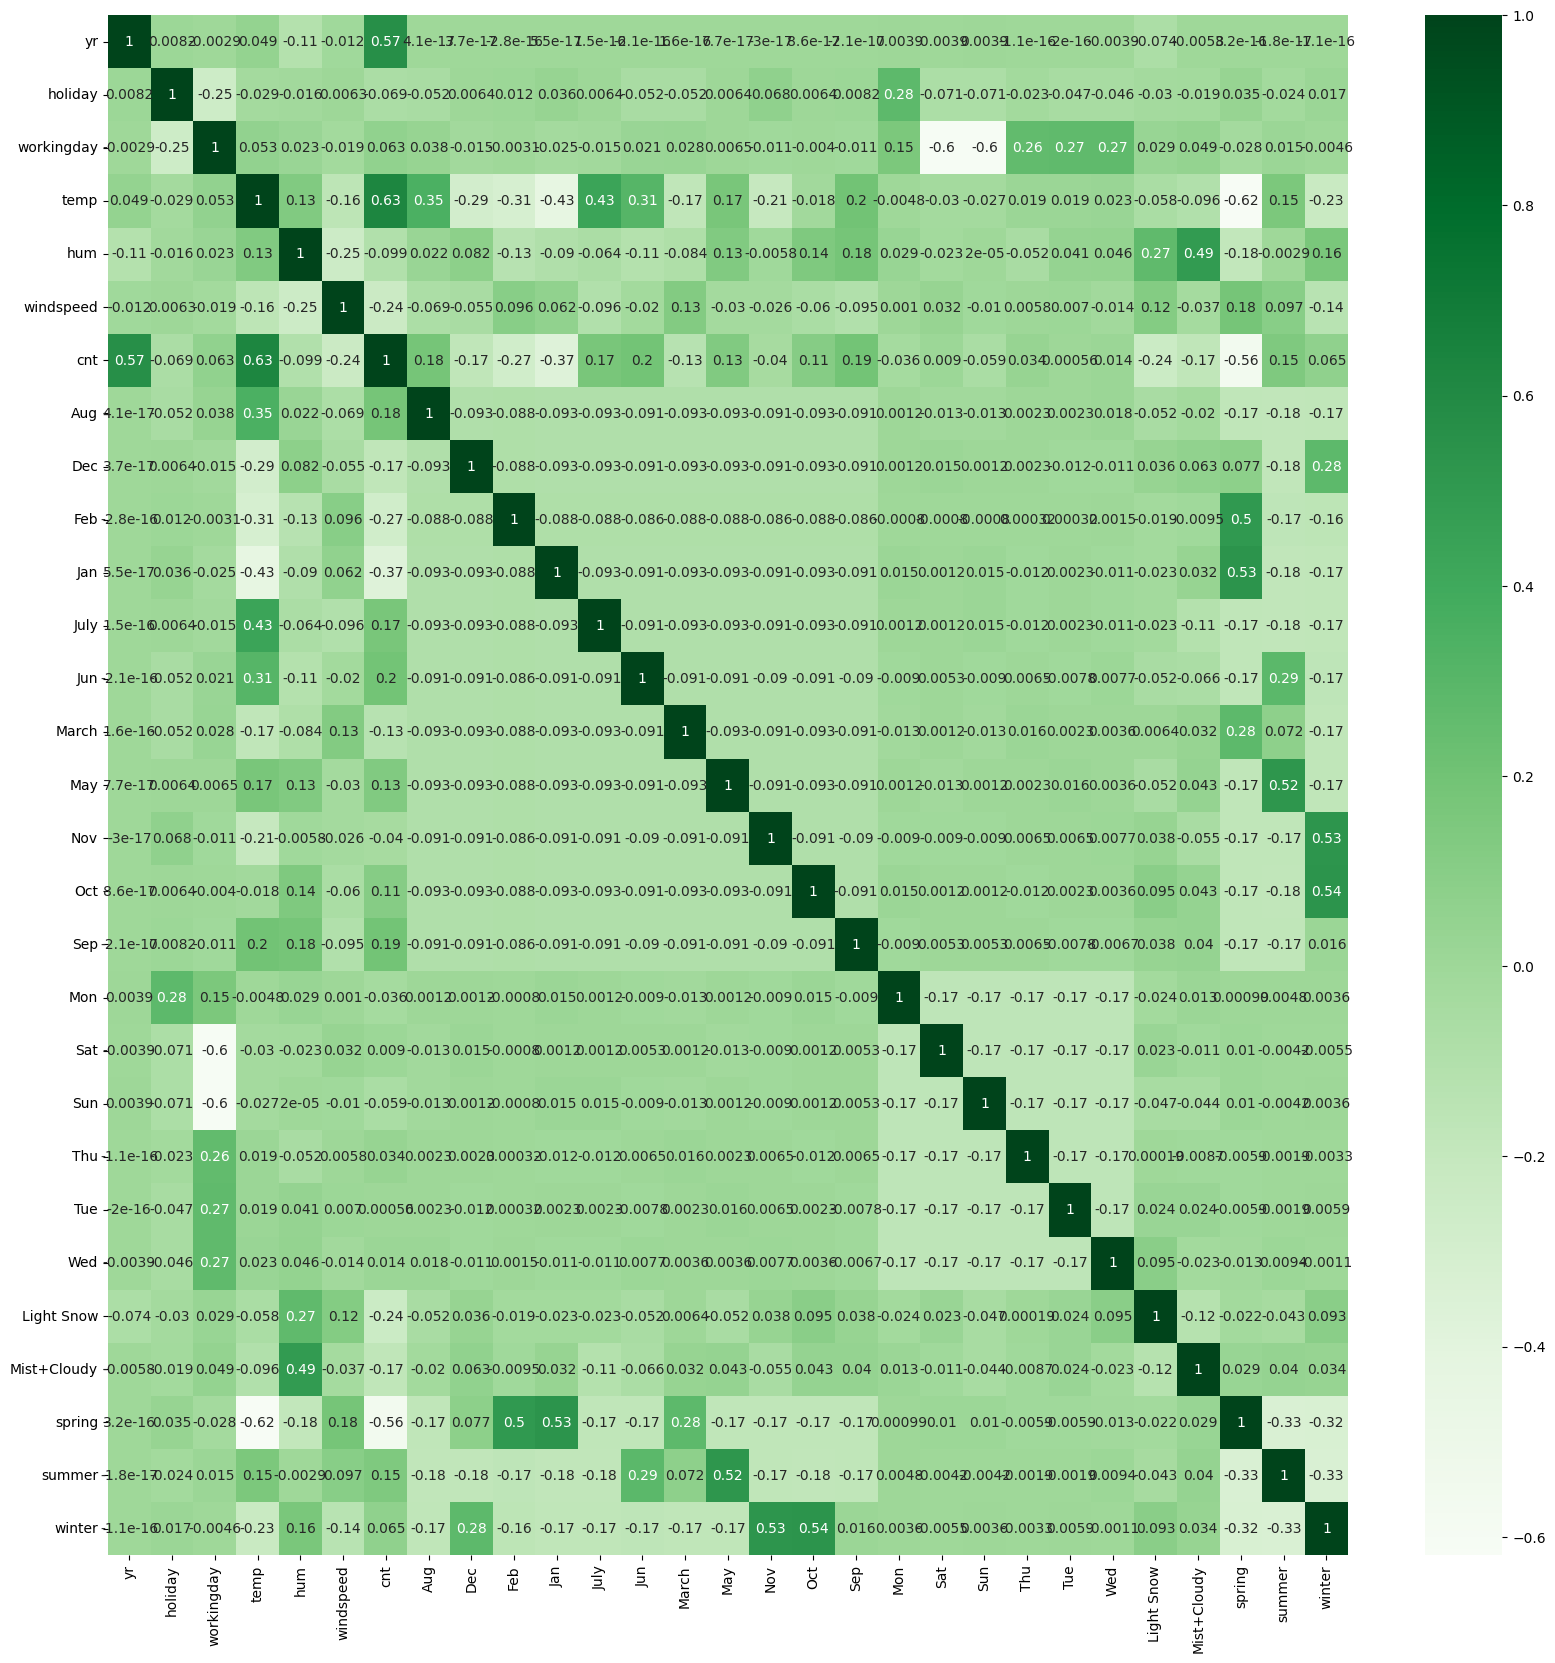

In [624]:
#Lets create correlation between the variables to understand relationships of data
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="Greens", annot=True)
# plt.title('Correlation between variables in the dataset')
plt.show()

In [625]:
# Preparing the data for model training

In [626]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [627]:
df_train.shape

(510, 29)

In [628]:
df_test.shape

(220, 29)

In [629]:
# Scaling the variables

In [630]:
scaler = MinMaxScaler()
var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])


In [631]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [632]:
# Splitting the Data into Training and Testing Sets

In [633]:
y_train = df_train.pop('cnt')
x_train = df_train

In [634]:
# add constant
x_train_sm = sm.add_constant(x_train["temp"])

In [635]:
# create model
lr = sm.OLS(y_train,x_train_sm)

In [636]:
# Fit model
lr_model = lr.fit()

In [637]:
# parameter
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [638]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.46e-61
Time:                        21:56:32   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [639]:
# In model summary we realize R-Squared is 0.416 i.e. 41%. above 41% varience is explained by "temperature"

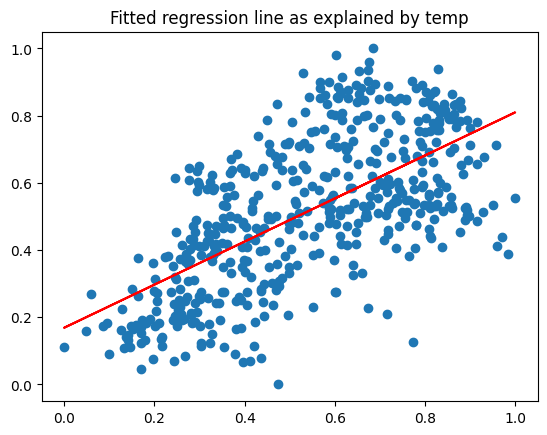

In [640]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(x_train_sm.iloc[:, 1], y_train)
plt.plot(x_train_sm.iloc[:, 1], 0.1690 + 0.6409*x_train_sm.iloc[:, 1], "r")
plt.title('Fitted regression line as explained by temp')
plt.show()

In [641]:
# lets try to add another variable yr

In [642]:
x_train_sm = x_train[['temp', 'yr']]

x_train_sm = sm.add_constant(x_train_sm)

lr = sm.OLS(y_train , x_train_sm)

lr_model = lr.fit()

lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [643]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          3.34e-130
Time:                        21:56:33   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [644]:
# In model summary we realize R-Squared is 0.692 i.e. 69%. Above 69% varience is explained by "temperature" & "Year"

In [645]:
#  lets try to add all variable in model to check R squared values

In [646]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'Jun', 'March', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist+Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [647]:
# try to building model with all variables
x_train_sm = sm.add_constant(x_train)

#create model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const          0.243106
yr             0.232438
holiday        0.010042
workingday     0.096177
temp           0.445359
hum           -0.151473
windspeed     -0.186010
Aug            0.020376
Dec           -0.044277
Feb           -0.032441
Jan           -0.063315
July          -0.033848
Jun            0.004602
March          0.001274
May            0.024673
Nov           -0.039879
Oct            0.007546
Sep            0.085938
Mon           -0.020931
Sat            0.095554
Sun            0.041333
Thu           -0.009131
Tue           -0.017931
Wed           -0.005495
Light Snow    -0.255835
Mist+Cloudy   -0.059551
spring        -0.044834
summer         0.043002
winter         0.107632
dtype: float64

In [648]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          3.00e-181
Time:                        21:56:33   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2431      0.035      6.888      0.000       0.174       0.312
yr              0.2324      0.008     28.819      0.000       0.217       0.248
holiday         0.0100      0.024      0.418      0.676      -0.037       0.057
workingday      0.0962      0.012      7.835      0.000       0.072       0.120
temp            0.4454      0.046      9.628      0.000       0.354       0.536
hum            -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed      -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug             0.0204      0.034      0.607      0.544      -0.046       0.086
Dec            -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb            -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan            -0.0633      0.034     -1.885      0.060      -0.129       0.003
July           -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun             0.0046      0.025      0.186      0.853      -0.044       0.053
March           0.0013      0.025      0.052      0.959      -0.047       0.050
May             0.0247      0.021      1.173      0.241      -0.017       0.066
Nov            -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct             0.0075      0.036      0.210      0.834      -0.063       0.078
Sep             0.0859      0.032      2.692      0.007       0.023       0.149
Mon            -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat             0.0956      0.014      6.958      0.000       0.069       0.123
Sun             0.0413      0.014      2.964      0.003       0.014       0.069
Thu            -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue            -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed            -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist+Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring         -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer          0.0430      0.026      1.645      0.101      -0.008       0.094
winter          0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covar

In [649]:
# In model summary we realize R-Squared is 0.853 i.e. 85%. Above 85% varience is explained by "temperature" & "Year"
# but The smallest eigenvalue is 5.7e-28. This might indicate that there arestrong multicollinearity problems or that the design matrix is singular.

In [650]:
# We will now use RFE for automated approach.

In [651]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [652]:
#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting RFE ofject on our training dataset
rfe = rfe.fit(x_train, y_train)

In [653]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('Jun', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist+Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [654]:
tru_rfe = x_train.columns[rfe.support_]

In [655]:
tru_rfe
len(tru_rfe)

15

In [656]:
# lets try to create new model 

In [657]:
x_train_rfe = x_train[tru_rfe]


In [658]:
#adding constant to training variable
x_train_rfe = sm.add_constant(x_train_rfe)

#creating training model 
lr = sm.OLS(y_train, x_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const          0.199526
yr             0.229763
holiday       -0.018447
workingday     0.083669
temp           0.527708
hum           -0.161086
windspeed     -0.180875
July          -0.054616
Sep            0.081983
Sat            0.093668
Sun            0.040636
Light Snow    -0.245009
Mist+Cloudy   -0.056344
spring        -0.055546
summer         0.053733
winter         0.099214
dtype: float64

In [659]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        21:56:34   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1995      0.028      7.200      0.000       0.145       0.254
yr              0.2298      0.008     28.647      0.000       0.214       0.246
holiday        -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday      0.0837      0.010      8.665      0.000       0.065       0.103
temp            0.5277      0.033     15.884      0.000       0.462       0.593
hum            -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed      -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep             0.0820      0.017      4.966      0.000       0.050       0.114
Sat             0.0937      0.012      8.040      0.000       0.071       0.117
Sun             0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow     -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist+Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring         -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer          0.0537      0.015      3.631      0.000       0.025       0.083
winter          0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [660]:
# lets check VIF MODEL 

In [661]:
#dropping the constant variables from the dataset
x_train_rfe = x_train_rfe.drop(['const'], axis = 1)

In [662]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,50.68
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Mist+Cloudy,1.57


In [663]:
# workingday variable can be dropped due to high VIF
X_train_new_1 = x_train_rfe.drop(['workingday'], axis = 1)

In [664]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.params

const          0.283196
yr             0.229763
holiday       -0.102116
temp           0.527708
hum           -0.161086
windspeed     -0.180875
July          -0.054616
Sep            0.081983
Sat            0.009998
Sun           -0.043033
Light Snow    -0.245009
Mist+Cloudy   -0.056344
spring        -0.055546
summer         0.053733
winter         0.099214
dtype: float64

In [665]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        21:56:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2832      0.034      8.300      0.000       0.216       0.350
yr              0.2298      0.008     28.647      0.000       0.214       0.246
holiday        -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp            0.5277      0.033     15.884      0.000       0.462       0.593
hum            -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed      -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep             0.0820      0.017      4.966      0.000       0.050       0.114
Sat             0.0100      0.011      0.897      0.370      -0.012       0.032
Sun            -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light Snow     -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist+Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring         -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer          0.0537      0.015      3.631      0.000       0.025       0.083
winter          0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [666]:
# we can drop constant Variable 
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [667]:
# Lets Calculate VIF
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Mist+Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [668]:
#Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [669]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.12e-192
Time:                        21:56:35   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2858      0.034      8.409      0.000       0.219       0.353
yr              0.2295      0.008     28.639      0.000       0.214       0.245
holiday        -0.1041      0.025     -4.118      0.000      -0.154      -0.054
temp            0.5273      0.033     15.876      0.000       0.462       0.593
hum            -0.1623      0.037     -4.349      0.000      -0.236      -0.089
windspeed      -0.1801      0.025     -7.092      0.000      -0.230      -0.130
July           -0.0543      0.018     -3.004      0.003      -0.090      -0.019
Sep             0.0821      0.017      4.974      0.000       0.050       0.115
Sun            -0.0449      0.011     -3.952      0.000      -0.067      -0.023
Light Snow     -0.2447      0.026     -9.385      0.000      -0.296      -0.193
Mist+Cloudy    -0.0562      0.010     -5.411      0.000      -0.077      -0.036
spring         -0.0555      0.021     -2.696      0.007      -0.096      -0.015
summer          0.0537      0.015      3.627      0.000       0.025       0.083
winter          0.0995      0.017      5.834      0.000       0.066       0.133
==============================================================================
Omnibus:                       61.336   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.517
Skew:                          -0.618   Prob(JB):                     4.62e-34
Kurtosis:                       5.387   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [670]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [671]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Mist+Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [672]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [673]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.params

const          0.206034
yr             0.233472
holiday       -0.105201
temp           0.490684
windspeed     -0.147854
July          -0.049235
Sep            0.076013
Sun           -0.048345
Light Snow    -0.289492
Mist+Cloudy   -0.082198
spring        -0.065521
summer         0.047536
winter         0.084806
dtype: float64

In [674]:
lr_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          1.45e-189
Time:                        21:56:35   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2060      0.029      7.074      0.000       0.149       0.263
yr              0.2335      0.008     28.807      0.000       0.218       0.249
holiday        -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp            0.4907      0.033     15.004      0.000       0.426       0.555
windspeed      -0.1479      0.025     -5.981      0.000      -0.196      -0.099
July           -0.0492      0.018     -2.680      0.008      -0.085      -0.013
Sep             0.0760      0.017      4.541      0.000       0.043       0.109
Sun            -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light Snow     -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist+Cloudy    -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring         -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer          0.0475      0.015      3.171      0.002       0.018       0.077
winter          0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [675]:
# lets check VIF
X_train_lr3  = X_train_lr3.drop(["const"],axis = 1)

In [676]:
vif = pd.DataFrame()
X = X_train_new_3
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
VIF = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,yr,2.07
1,holiday,1.05
2,temp,5.14
3,windspeed,4.60
4,July,1.59
5,Sep,1.34
6,Sun,1.18
7,Light Snow,1.08
8,Mist+Cloudy,1.56
9,spring,2.11


In [677]:
x_train_new_4 = X_train_lr3.drop(["windspeed"],axis =1 )

In [678]:
# adding constant 
X_train_lr4 = sm.add_constant(x_train_new_4)

# creating model
lr = sm.OLS(y_train, x_train_new_4)

# Fit model
lr_model = lr.fit()

lr_model.params

yr             0.235334
holiday       -0.103882
temp           0.667425
July          -0.038498
Sep            0.099900
Sun           -0.044727
Light Snow    -0.294607
Mist+Cloudy   -0.072569
spring         0.027969
summer         0.092466
winter         0.162234
dtype: float64

In [679]:
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1523.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):                        0.00
Time:                        21:56:36   Log-Likelihood:                          475.29
No. Observations:                 510   AIC:                                     -928.6
Df Residuals:                     499   BIC:                                     -882.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yr              0.2353      0.009     27.365      0.000       0.218       0.252
holiday        -0.1039      0.027     -3.799      0.000      -0.158      -0.050
temp            0.6674      0.015     44.128      0.000       0.638       0.697
July           -0.0385      0.019     -1.982      0.048      -0.077      -0.000
Sep             0.0999      0.017      5.744      0.000       0.066       0.134
Sun            -0.0447      0.012     -3.652      0.000      -0.069      -0.021
Light Snow     -0.2946      0.026    -11.455      0.000      -0.345      -0.244
Mist+Cloudy    -0.0726      0.009     -8.014      0.000      -0.090      -0.055
spring          0.0280      0.010      2.707      0.007       0.008       0.048
summer          0.0925      0.012      7.724      0.000       0.069       0.116
winter          0.1622      0.011     14.918      0.000       0.141       0.184
==============================================================================
Omnibus:                       66.215   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.037
Skew:                          -0.717   Prob(JB):                     1.44e-31
Kurtosis:                       5.151   Cond. No.                         6.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [680]:
#checking the VIF of the model 
# dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [681]:
vif = pd.DataFrame()
X = x_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.06
9,summer,1.95
10,winter,1.61
3,July,1.59
7,Mist+Cloudy,1.56
8,spring,1.43
4,Sep,1.34
5,Sun,1.18
6,Light Snow,1.07


In [682]:
#July is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)

In [683]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.7
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          5.14e-183
Time:                        21:56:36   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -904.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1487      0.029      5.145      0.000       0.092       0.205
yr              0.2330      0.008     27.652      0.000       0.216       0.250
holiday        -0.1071      0.027     -4.002      0.000      -0.160      -0.055
temp            0.4900      0.034     14.580      0.000       0.424       0.556
Sep             0.0938      0.017      5.647      0.000       0.061       0.126
Sun            -0.0495      0.012     -4.130      0.000      -0.073      -0.026
Light Snow     -0.3052      0.025    -12.099      0.000      -0.355      -0.256
Mist+Cloudy    -0.0792      0.009     -8.832      0.000      -0.097      -0.062
spring         -0.0637      0.021     -3.012      0.003      -0.105      -0.022
summer          0.0525      0.014      3.646      0.000       0.024       0.081
winter          0.0981      0.017      5.749      0.000       0.065       0.132
==============================================================================
Omnibus:                       72.159   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.039
Skew:                          -0.703   Prob(JB):                     1.99e-42
Kurtosis:                       5.657   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [684]:
#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [685]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.97
0,yr,2.06
8,summer,1.64
6,Mist+Cloudy,1.55
9,winter,1.46
7,spring,1.35
3,Sep,1.23
4,Sun,1.18
5,Light Snow,1.07
1,holiday,1.05


In [686]:
# The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

# The VIF should be generally <5 and we have achieved that condition with all the variables.

# The R-squared value achieved is 82.7% which suggests a high correlation between the dependent variable 
# (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.

In [687]:
# Lets Start Residual analysis

In [688]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr5

,const,yr,holiday,temp,Sep,Sun,Light Snow,Mist+Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,1,0,0.442393,0.0,0.0,0.0,1.0,1.0,0.0,0.0
728,1.0,1,0,0.245101,0.0,1.0,0.0,0.0,1.0,0.0,0.0
482,1.0,1,0,0.395666,0.0,0.0,0.0,1.0,0.0,1.0,0.0
111,1.0,0,0,0.345824,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,0,0,0.202618,0.0,0.0,0.0,0.0,1.0,0.0,0.0
350,1.0,0,0,0.248216,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79,1.0,0,0,0.462664,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [689]:
# Lets prepare Y_train
y_train_pred = lr_model.predict(X_train_lr5)

In [690]:
res = y_train - y_train_pred

<Axes: ylabel='Density'>

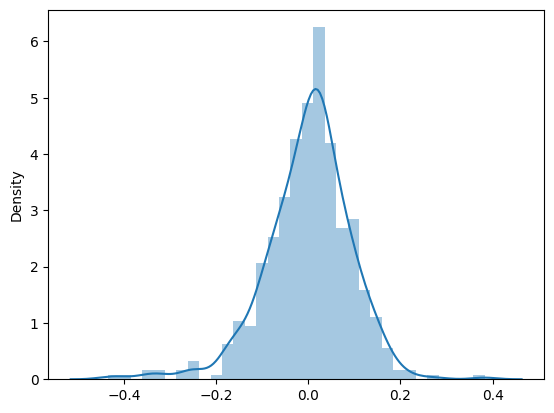

In [691]:
sns.distplot(res)

In [692]:
# Prediction and Analysis 

In [693]:
var

['hum', 'windspeed', 'temp', 'cnt']

In [694]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[var] = scaler.transform(df_test[var])

In [695]:
# Check dataset
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [696]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [697]:

y_test = df_test.pop('cnt')
X_test = df_test

In [698]:
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [699]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,1,0,1,0.901354,0.610133,0.153728,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
299,0,0,1,0.511964,0.837699,0.334206,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
221,0,0,1,0.881625,0.437098,0.339570,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,0.817246,0.314298,0.537414,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [700]:
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Sep', 'Sun', 'Light Snow',
       'Mist+Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [701]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [702]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

In [703]:
#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [704]:
#making predictions
y_pred = lr_model.predict(X_test_new)

In [705]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
r2_test

0.8113189584286535

In [706]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


In [707]:
#lets plot y_test and y_pred to understand the spread

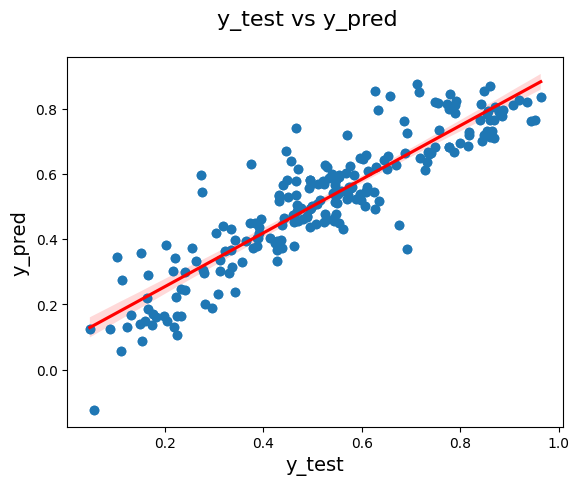

In [708]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [709]:
# We can see that the equation of our best fitted line is:
# cnt = 0.2330×yr + 0.4900×temp - 0.1071×holiday + 0.0938×Sep - 0.0495×Sun - 0.3052×LightSnow - 0.0792×MistCloudy - 0.0637×spring + 0.0525×summer + 0.0981×winter + 0.1487

In [710]:

#lets find out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008689716000619054
Mean squared error of the test set is 0.00902164805945191


In [711]:
# by observing our model's mean squared error i.e. almost 0, 
# it implies that our model accurately predicts the variance between in both the test and train datasets

In [712]:
# l̥ets Result Comparison between Train model and Test:

# Train R^2 : 0.827
# - Train Adjusted R^2 : 0.82 
# - Test R^2: 0.8113
# - Test Adjusted R^2: 0.790564
# - Difference in R^2 between train and test: 1.6%
# - Difference in adjusted R^2 between Train and test: 3.0 % which is less than 5%

In [713]:
# Interpretation
# We arrived at a very decent model for the the demand for shared bikes with the significant variables

# We can see that temperature variable is having the highest coefficient 0.4914,
# which means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units.

# Similary we can see coefficients of other variables in the equation for best fitted line.


# We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases,
# the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value
# signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables
# in the model constant.


In [714]:
# A US bike-sharing provider BoomBikes can focus more on Temperature
# - We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
# - Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.
# - We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand
# - Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather... And yes we can give offers